<a href="https://colab.research.google.com/github/paris3169/ZM-study-practice/blob/main/008_practicing_NLP_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random

In [2]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

--2022-09-10 09:35:08--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2022-09-10 09:35:08 (132 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [3]:
!wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"

--2022-09-10 09:35:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-09-10 09:35:08 (113 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
from helper_functions import unzip_data, make_confusion_matrix, calculate_results, plot_loss_curves

In [5]:
unzip_data("/content/nlp_getting_started.zip")

In [6]:
train_df=pd.read_csv("/content/train.csv")
test_df=pd.read_csv("/content/test.csv")

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [9]:
train_df["target"].value_counts()/len(train_df)

0    0.57034
1    0.42966
Name: target, dtype: float64

In [10]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [11]:
train_df.index

RangeIndex(start=0, stop=7613, step=1)

In [12]:
np.random.choice(train_df.index,size=10)   #this is tp generate a random list if indexes in the df dataframe

array([2308, 3158, 4946, 3237, 7538, 2432, 6134, 4523, 6016,  948])

In [13]:
random_indexes=np.random.choice(train_df.index,size=5)
random_indexes

array([1141, 7358, 7411, 3905, 6437])

In [14]:
df=train_df.loc[random_indexes][["text","target"]]
df

,text,target
1141,@NBCNews Yea bombing #pearlharbor not so good ...,1
7358,For sixth year in a row premium costs for wind...,0
7411,Gunmen kill four in El Salvador bus attack: Su...,1
3905,'the fallacy is it is up to the steam roller. ...,0
6437,Turkish troops killed in Kurdish militant 'sui...,1


In [15]:
train_df_shuffled=train_df.sample(frac=1,random_state=42)

In [16]:
#visualize some random tweets from train_df and from test_df
random_df=train_df_shuffled[["text","target"]].loc[random_indexes]
random_df

,text,target
1141,@NBCNews Yea bombing #pearlharbor not so good ...,1
7358,For sixth year in a row premium costs for wind...,0
7411,Gunmen kill four in El Salvador bus attack: Su...,1
3905,'the fallacy is it is up to the steam roller. ...,0
6437,Turkish troops killed in Kurdish militant 'sui...,1


In [17]:
def visualize_tweets(df,size=10):
  random_indexes=np.random.choice(df.index,size=size)
  include_target="target" in df.columns  #to check if the passed dataframe contain also the target label (is a train dataframe)
  if include_target==True:
    columns=["text","target"]
  else:
    columns=["text"]
  random_df=df[columns].loc[random_indexes]
  for row,col in random_df.iterrows():
    print(f"tweet index: {row}")
    text=col["text"]
    print(f"tweet: {text}")
    if include_target==True:
      target=col["target"]
      tweet_type="disaster" if target==1 else "no disaster"
      print(f"target: {target}, tweet_type: {tweet_type}")
    print("\n")


In [18]:
visualize_tweets(train_df,size=3)

tweet index: 5155
tweet: Souda leave Lady Sonia alone or I shall obliterate you #KneelBot
target: 0, tweet_type: no disaster


tweet index: 1807
tweet: AKILAH WORLD NEWS Cop pulls man from car to avoid this ... http://t.co/Vn2Fnmy7li
target: 1, tweet_type: disaster


tweet index: 6976
tweet: @Eric_Tsunami worry about yourself
target: 0, tweet_type: no disaster




In [19]:
#I've decided to make a function with these lines of codes for beter reuse in future. All custoner functions are made available in the custom_functions.py modul

In [20]:
from custom_functions import visualize_tweets

In [21]:
#let's try if now is also working
visualize_tweets(train_df,size=5)

tweet index: 7144
tweet: Not only does he know the latest research the kiddo's GI specialist sang the volcano number from Inside Out. Now THAT is whole person care.
target: 1, tweet_type: disaster


tweet index: 1278
tweet: Don't get burned twice by the same flame.
target: 0, tweet_type: no disaster


tweet index: 1583
tweet: Photographer Brian Ruebs endures 4500-feet climb to capture bride and groom http://t.co/JXhAZEBNQK
target: 0, tweet_type: no disaster


tweet index: 2130
tweet: This why BSF Jawans died Fidayeen has AKs and they bloody #INSAS! INSAS rifles not to blame for soldiers' deaths MoD http://t.co/1Lk1EQwyUW
target: 1, tweet_type: disaster


tweet index: 1071
tweet: Jen you da bomb girl! https://t.co/czQr3CI9Xw
target: 0, tweet_type: no disaster




now we need to split the data in train and validation sets. we want to slice a random subsets of 10% of data for valudation from the train data (where we have the target labels while using the test data just for checking the model prediction accuracy

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_sentences,val_sentences,train_labels,val_labels=train_test_split(train_df_shuffled["text"].values,
                                                                       train_df_shuffled["target"].values,
                                                                       test_size=0.1,random_state=42)

In [24]:
train_sentences[:10],train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

In [25]:
val_sentences[:5],val_labels[:5]

(array(['DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5',
        'FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday',
        'Gunmen kill four in El Salvador bus attack: Suspected Salvadoran gang members killed four people and wounded s... http://t.co/CNtwB6ScZj',
        '@camilacabello97 Internally and externally screaming',
        'Radiation emergency #preparedness starts with knowing to: get inside stay inside and stay tuned http://t.co/RFFPqBAz2F via @CDCgov'],
       dtype=object), array([0, 0, 1, 1, 1]))

In [26]:
#there is also an alternative way to do this split wo using the sklearn module
train_set=train_df_shuffled.sample(frac=0.9)

In [27]:
len(train_df_shuffled),len(train_set)

(7613, 6852)

In [28]:
train_indexes=train_set.index
test_indexes=[i for i in train_df_shuffled.index if i not in train_indexes]
test_set=train_df_shuffled.loc[test_indexes]

In [29]:
len(train_set),len(test_set),len(train_set)+len(test_set),len(train_df_shuffled)

(6852, 761, 7613, 7613)

let's now start transforming test in numbers (toketization and embedding)

In [30]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [31]:
train_sentences.shape,val_sentences.shape

((6851,), (762,))

In [32]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [33]:
my_sentence="this is a simple sentence"

In [34]:
#found average number of token in a sentence (token = word)
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [35]:
text_vectorizer=TextVectorization(max_tokens=1000,
                                  standardize="lower_and_strip_punctuation",
                                  split="whitespace",
                                  ngrams=None,
                                  output_mode="int",
                                  output_sequence_length=15)

In [36]:
text_vectorizer.adapt(train_sentences)

In [37]:
my_sentence

'this is a simple sentence'

In [38]:
output=text_vectorizer([my_sentence,"another sentence"])
output,output.shape

(<tf.Tensor: shape=(2, 15), dtype=int64, numpy=
 array([[ 19,   9,   3,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [165,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0]])>, TensorShape([2, 15]))

In [39]:
train_sentences

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       ...,
       'Near them on the sand half sunk a shattered visage lies... http://t.co/0kCCG1BT06',
       "kesabaran membuahkan hasil indah pada saat tepat! life isn't about waiting for the storm to pass it's about learning to dance in the rain.",
       "@ScottDPierce @billharris_tv @HarrisGle @Beezersun I'm forfeiting this years fantasy football pool out of fear I may win n get my ass kicked"],
      dtype=object)

In [40]:
output_tensor=text_vectorizer(train_sentences)
output_tensor.shape

TensorShape([6851, 15])

In [41]:
vocab_size=len(text_vectorizer.get_vocabulary())
vocab_size

1000

In [42]:
output_tensor[0],output_tensor[0].shape

(<tf.Tensor: shape=(15,), dtype=int64, numpy=
 array([  1,   1,   8, 387,  43,   1, 978,   0,   0,   0,   0,   0,   0,
          0,   0])>, TensorShape([15]))

In [43]:
embedding=tf.keras.layers.Embedding(input_dim=vocab_size,
                                    output_dim=128,
                                    input_length=15, name="Embedding")

In [44]:
random_sentence=random.choice(train_sentences)
random_sentence

'The Whirlwind! Scourge of Europe! RT @whedonesque Or you could just watch the Fanged Four http://t.co/Q0JHDcU6Ly'

In [45]:
embed=embedding(text_vectorizer([random_sentence]))
embed,embed.shape

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[ 3.6097158e-02, -3.1720847e-05, -3.9596021e-02, ...,
           3.6567900e-02, -4.4347253e-02,  1.9938592e-02],
         [ 6.2787645e-03,  1.8003974e-02,  1.8127326e-02, ...,
          -4.2333256e-02,  4.8595164e-02, -2.5687670e-02],
         [ 1.5550088e-02,  7.9678372e-04,  1.8685225e-02, ...,
          -4.2564560e-02, -5.3644665e-03,  1.2951780e-02],
         ...,
         [ 3.6097158e-02, -3.1720847e-05, -3.9596021e-02, ...,
           3.6567900e-02, -4.4347253e-02,  1.9938592e-02],
         [ 1.5550088e-02,  7.9678372e-04,  1.8685225e-02, ...,
          -4.2564560e-02, -5.3644665e-03,  1.2951780e-02],
         [ 1.5550088e-02,  7.9678372e-04,  1.8685225e-02, ...,
          -4.2564560e-02, -5.3644665e-03,  1.2951780e-02]]], dtype=float32)>,
 TensorShape([1, 15, 128]))

In [46]:
embed_tf=embedding(text_vectorizer(train_sentences))
embed_tf.shape

TensorShape([6851, 15, 128])

In [47]:
#Now let's create a model using RNN

In [48]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [49]:
#build a model with functional API of Keras
from tensorflow.keras import layers

In [50]:
train_sentences.shape,val_sentences.shape

((6851,), (762,))

In [51]:
input=layers.Input(shape=[1],dtype="string")
x=text_vectorizer(input)
x=embedding(x)
x=layers.Dense(64,activation="relu")(x)
x=layers.GlobalAvgPool1D(name="global_average_pooling")(x)
output=layers.Dense(1,activation="sigmoid")(x)
model_1=tf.keras.Model(input,output,name="model_1")

In [52]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 Embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 dense (Dense)               (None, 15, 64)            8256      
                                                                 
 global_average_pooling (Glo  (None, 64)               0         
 balAveragePooling1D)                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 65  

In [53]:
model_1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [54]:
train_sentences[:2],train_labels[:2]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma'], dtype=object),
 array([0, 0]))

In [55]:
model_1_history=model_1.fit(train_sentences,train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20220910-093513
Epoch 1/5
215/215 [==============================] - 5s 6ms/step - loss: 0.5761 - accuracy: 0.6919 - val_loss: 0.4886 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.4290 - accuracy: 0.8069 - val_loss: 0.4851 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.3979 - accuracy: 0.8209 - val_loss: 0.4932 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.3866 - accuracy: 0.8237 - val_loss: 0.5108 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.3790 - accuracy: 0.8321 - val_loss: 0.5078 - val_accuracy: 0.7769


In [ ]:
!tensorboard dev upload --logdir ./model_logs \
   --name "First deep model on text data" \
   --description "Trying a dense model with an embedding layer" \
   --one_shot # exits the uploader when upload has finished

In [57]:
model_1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.5078 - accuracy: 0.7769


[0.5077970623970032, 0.7769029140472412]

In [58]:
#calculate the full perfomance indicators

In [59]:
len(val_sentences),val_sentences.shape

(762, (762,))

In [60]:
val_sentences[:1]

array(['DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5'],
      dtype=object)

In [61]:
y_pred_probs=model_1.predict(val_sentences)
y_pred=np.round(tf.squeeze(y_pred_probs,axis=1))
y_pred_probs.shape,y_pred.shape,y_pred[:10]

((762, 1),
 (762,),
 array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32))

In [62]:
model_1_results=calculate_results(y_true=val_labels,y_pred=y_pred)

In [63]:
model_1_results

{'accuracy': 77.69028871391076,
 'precision': 0.7822241302284023,
 'recall': 0.7769028871391076,
 'f1': 0.7734519762210931}

In [64]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 Embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 dense (Dense)               (None, 15, 64)            8256      
                                                                 
 global_average_pooling (Glo  (None, 64)               0         
 balAveragePooling1D)                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 65  

In [65]:
vocabolary=text_vectorizer.get_vocabulary()
vocabolary[:10],len(vocabolary)

(['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'], 1000)

In [66]:
model_1.layers[2].weights #this is the mapping learned between each worg (token) of the vocabulary and the embedded vector (of dimension = 128)

[<tf.Variable 'Embedding/embeddings:0' shape=(1000, 128) dtype=float32, numpy=
 array([[-0.00639019,  0.03227486,  0.02936461, ...,  0.06707809,
         -0.05349408,  0.04324478],
        [ 0.02081123, -0.01969296,  0.02256613, ..., -0.09683263,
         -0.01350557, -0.01103323],
        [ 0.05170122,  0.01836598, -0.02613564, ...,  0.01611911,
         -0.06077953, -0.0019864 ],
        ...,
        [ 0.00178333,  0.02035736,  0.06096955, ..., -0.02675043,
         -0.02872163,  0.01710762],
        [ 0.07803369,  0.02787723,  0.03134323, ...,  0.04947091,
          0.00681637,  0.01229837],
        [-0.04443787, -0.01550654, -0.02246678, ..., -0.06968623,
         -0.02256709,  0.01291798]], dtype=float32)>]

In [67]:
#let's now build a recurrent NN

In [68]:
text_vectorizer_1=tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=10000,
                                                                             output_mode="int",
                                                                             output_sequence_length=15)

In [69]:
train_sentences[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [70]:
text_vectorizer.adapt(train_sentences)

In [71]:
vocab_size=len(text_vectorizer.get_vocabulary())
vocab_size

1000

In [72]:
input=tf.keras.Input(shape=(1,),dtype="string",name="input_layer")

In [73]:
x=text_vectorizer(input)
x.shape

TensorShape([None, 15])

In [74]:
embedding_layer=tf.keras.layers.Embedding(input_dim=vocab_size,
                            input_length=15,
                            output_dim=128,
                            name="embedding")

In [75]:
x=embedding_layer(x)

In [76]:
x.shape

TensorShape([None, 15, 128])

In [77]:
x=tf.keras.layers.LSTM(64,return_sequences=True)(x)

In [78]:
x.shape

TensorShape([None, 15, 64])

In [79]:
x=tf.keras.layers.LSTM(64)(x)

In [80]:
x.shape

TensorShape([None, 64])

In [81]:
output=tf.keras.layers.Dense(1,activation="sigmoid")(x)
x.shape

TensorShape([None, 64])

In [82]:
model_2=tf.keras.Model(input,output)

In [83]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                             

In [84]:
model_2.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [85]:
train_labels[:3],val_labels[:3]

(array([0, 0, 1]), array([0, 0, 1]))

In [86]:
model_2_history=model_2.fit(train_sentences,train_labels,
                            epochs=5,validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback("model_logs",experiment_name="model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20220910-093557
Epoch 1/5
215/215 [==============================] - 8s 11ms/step - loss: 0.5206 - accuracy: 0.7358 - val_loss: 0.4891 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4237 - accuracy: 0.8113 - val_loss: 0.4720 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3990 - accuracy: 0.8276 - val_loss: 0.4847 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3840 - accuracy: 0.8316 - val_loss: 0.5396 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3594 - accuracy: 0.8460 - val_loss: 0.5021 - val_accuracy: 0.7598


In [87]:
model_2.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.5021 - accuracy: 0.7598


[0.5020800232887268, 0.7598425149917603]

In [88]:
y_pred_probs=model_2.predict(val_sentences)

In [89]:
y_pred_probs.shape

(762, 1)

In [90]:
y_pred=np.round(tf.squeeze(y_pred_probs,axis=1))

In [91]:
y_pred.shape

(762,)

In [92]:
model_2_results=calculate_results(val_labels,y_pred=y_pred)

In [93]:
model_2_results

{'accuracy': 75.98425196850394,
 'precision': 0.7594533682067887,
 'recall': 0.7598425196850394,
 'f1': 0.759488581844846}

In [94]:
model_1_results

{'accuracy': 77.69028871391076,
 'precision': 0.7822241302284023,
 'recall': 0.7769028871391076,
 'f1': 0.7734519762210931}

In [95]:
df_performance=pd.DataFrame({"model_1":model_1_results,"model_2":model_2_results})

In [96]:
df_performance

,model_1,model_2
accuracy,77.690289,75.984252
precision,0.782224,0.759453
recall,0.776903,0.759843
f1,0.773452,0.759489


In [97]:
#let's build a model with transfer learning

In [98]:
import tensorflow_hub as hub

In [99]:
embedding_3=hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [100]:
sample="vediamo se funziona bene"
embedding_3([sample]).shape

TensorShape([1, 512])

In [101]:
embedding_3(train_sentences).shape

TensorShape([6851, 512])

In [102]:
train_sentences.shape,val_sentences.shape

((6851,), (762,))

In [103]:
embedding_3=hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                 input_shape=[],
                 dtype=tf.string,
                 trainable=False,
                 name="USE")

In [104]:
input=tf.keras.Input(shape=(),dtype=tf.string,name="inputs")  #inportant to note that the inputs shape must be of rank 1

In [105]:
x=embedding_3(input)

In [106]:
x=tf.keras.layers.Dense(64,activation="relu")(x)

In [107]:
output=tf.keras.layers.Dense(1,activation="sigmoid")(x)

In [108]:
model_3=tf.keras.Model(input,output)

In [109]:
model_3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None,)]                 0         
                                                                 
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_3 (Dense)             (None, 64)                32832     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [110]:
model_3.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [111]:
model_3_history=model_3.fit(train_sentences,train_labels,
                            epochs=5,validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback("model_logs",experiment_name="model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20220910-093641
Epoch 1/5
215/215 [==============================] - 5s 14ms/step - loss: 0.5070 - accuracy: 0.7828 - val_loss: 0.4512 - val_accuracy: 0.7992
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4140 - accuracy: 0.8171 - val_loss: 0.4399 - val_accuracy: 0.8031
Epoch 3/5
215/215 [==============================] - 2s 12ms/step - loss: 0.4019 - accuracy: 0.8187 - val_loss: 0.4314 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3921 - accuracy: 0.8278 - val_loss: 0.4296 - val_accuracy: 0.8084
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3848 - accuracy: 0.8314 - val_loss: 0.4274 - val_accuracy: 0.8150


In [112]:
model_3.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 11ms/step - loss: 0.4274 - accuracy: 0.8150


[0.4274299740791321, 0.8149606585502625]

In [113]:
y_pred_probs=model_3.predict(val_sentences)
y_pred=np.round(tf.squeeze(y_pred_probs,axis=1))

In [114]:
model_3_results=calculate_results(y_true=val_labels,y_pred=y_pred)
model_3_results

{'accuracy': 81.49606299212599,
 'precision': 0.8152722931679139,
 'recall': 0.8149606299212598,
 'f1': 0.8142251446314539}

In [115]:
pd.DataFrame({"model_3":model_3_results}).values

array([[81.49606299],
       [ 0.81422514],
       [ 0.81527229],
       [ 0.81496063]])

In [116]:
df_performance["model_3"]=pd.DataFrame({"model_3":model_3_results}).values
df_performance

,model_1,model_2,model_3
accuracy,77.690289,75.984252,81.496063
precision,0.782224,0.759453,0.814225
recall,0.776903,0.759843,0.815272
f1,0.773452,0.759489,0.814961


In [117]:
comparing_results=df_performance.T
comparing_results

,accuracy,precision,recall,f1
model_1,77.690289,0.782224,0.776903,0.773452
model_2,75.984252,0.759453,0.759843,0.759489
model_3,81.496063,0.814225,0.815272,0.814961


In [118]:
comparing_results["accuracy"]=comparing_results["accuracy"]/100
comparing_results

,accuracy,precision,recall,f1
model_1,0.776903,0.782224,0.776903,0.773452
model_2,0.759843,0.759453,0.759843,0.759489
model_3,0.814961,0.814225,0.815272,0.814961


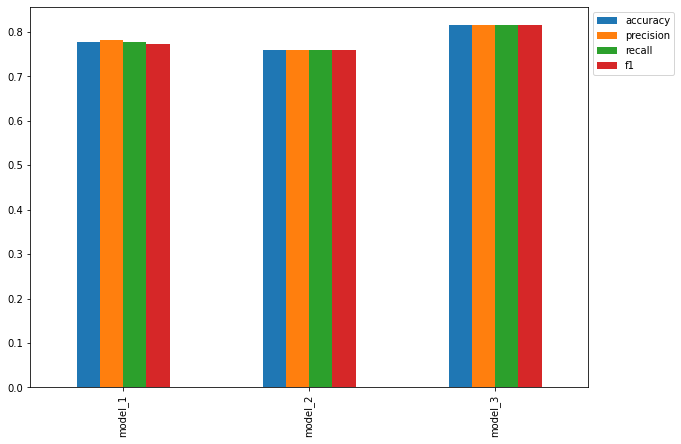

In [119]:
comparing_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

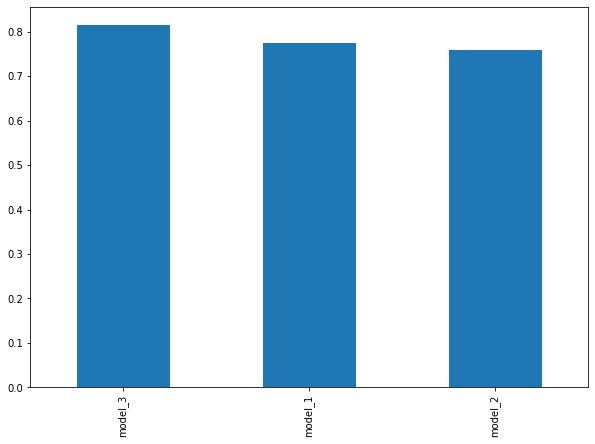

In [120]:
comparing_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

In [121]:
!tensorboard dev upload --logdir ./model_logs \
   --name "NLP modelling experiments" \
   --description "A series of different NLP modellings experiments with various models" \
   --one_shot # exits the uploader when upload has finished


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) no


In [122]:
model_3.save("saved_models")

In [123]:
!zip -r /content/saved_models.zip /content/saved_models

  adding: content/saved_models/ (stored 0%)
  adding: content/saved_models/keras_metadata.pb (deflated 84%)
  adding: content/saved_models/saved_model.pb (deflated 67%)
  adding: content/saved_models/variables/ (stored 0%)
  adding: content/saved_models/variables/variables.index (deflated 78%)
  adding: content/saved_models/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/saved_models/assets/ (stored 0%)


In [148]:
#calculate the most wrong precitions a and show the tweets
#most wrong are all wrong predictions (y_true!=y_pred) with the hight pred_prob. we ca sort in descenting order.
#lety's create for this a dataframe with columns = tweets, y_pred,y_true,pred_probs and sort in descending order by pred_probs column

all_wrong=pd.DataFrame({"tweet":val_sentences,"y_true":val_labels,"y_pred":y_pred,"pred_probs":tf.squeeze(pred_probs)})

In [149]:
all_wrong["right"]=all_wrong["y_true"]==all_wrong["y_pred"]

In [150]:
all_wrong["right"].value_counts()

True     621
False    141
Name: right, dtype: int64

In [155]:
all_wrong=all_wrong[all_wrong["y_true"]!=all_wrong["y_pred"]].sort_values(by="pred_probs",ascending=False)
most_wrong=all_wrong.head(10)
all_wrong[all_wrong["y_true"]==1]["tweet"].values

array(["US wont upgrade its infrastructure? http://t.co/NGEHhG9YGa' it a bad situation and its going to get ugly very quickly #USA #sustainability",
       'I moved to England five years ago today. What a whirlwind of time it has been! http://t.co/eaSlGeA1B7',
       '133 N past  the 5 L lane is reopened. All other lanes are closed. All lanes are open on the 133 S. Trash truck fire cleanup. @KNX1070',
       'When ur friend and u are talking about forest fires in a forest and he tells u to drop ur mix tape out there... #straightfire',
       'DireTube Information \x89ÛÒ Egypt Cyprus and Greece agreed to fightåÊterrorism http://t.co/V6IjxCCD2I http://t.co/YSXhFWMGOD',
       'Breakfast links: Work from home: Derailed: An empty train derailed at Smithsonian this morning suspending ser... http://t.co/iD4QGqDnJQ',
       '#Metepec #Mexico - ?NIGHT DISASTER?...E(Oficial) @ #NitClub #mÌ¼sica #mÌ¼sica http://t.co/WTfJF9jjzs',
       'So this storm just came out of no where. .fuck me its cool'

In [176]:
 #this check is really important so we want to functionize

 def get_most_wrong(test_sentences,test_labels,model,num=20):

    pred_probs=model.predict(test_sentences)
    y_pred=tf.squeeze(np.round(pred_probs),axis=1)
    df=pd.DataFrame({"tweet":test_sentences,"y_true":test_labels,"y_pred":y_pred,"pred_probs":tf.squeeze(pred_probs)})
    df["error"]=(df["y_true"]!=df["y_pred"])
    all_wrong=df.sort_values(by="pred_probs",ascending=False)
    most_wrong=all_wrong.head(num)
    return most_wrong

In [177]:
get_most_wrong(val_sentences,val_labels,model_3)

,tweet,y_true,y_pred,pred_probs,error
90,Dramatic Video Shows Plane Landing During Viol...,1,1.0,0.996555,False
179,beforeitsnews : Hundreds feared dead after Lib...,1,1.0,0.994791,False
166,BBC News - India rail crash: Trains derail in ...,1,1.0,0.993675,False
257,USGS reports a M1.94 #earthquake 5km S of Volc...,1,1.0,0.992958,False
734,The Latest: More homes razed by Northern Calif...,1,1.0,0.992652,False
388,13 security personnel killed in Iraq suicide b...,1,1.0,0.991953,False
103,How the West was burned: Thousands of wildfire...,1,1.0,0.991863,False
395,The Catastrophic Effects of Hiroshima and Naga...,1,1.0,0.991263,False
650,Debris confirmed from MH370; relatives hope fo...,1,1.0,0.990871,False
464,Suicide Bomber Kills 13 At Saudi Mosque http:/...,1,1.0,0.990605,False


In [182]:
 #now let's make our own predictions

 my_sentences=["is happening something similar to an heavy summer storm here around",
               "we are not willing to go there",
               "there have been heavy rain in the wood yesterday"]

In [183]:
np.round(model_3.predict(my_sentences))

array([[1.],
       [0.],
       [1.]], dtype=float32)